In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# load data
X = pd.read_csv('BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibDependentVariableLGAEncoded.csv')

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ethnicity_Other             12977 non-null  float64
 1   ethnicity_South Asian       12977 non-null  float64
 2   ethnicity_White             12977 non-null  float64
 3   ethnicity_nan               12977 non-null  float64
 4   maternalDiabetes_No         12977 non-null  float64
 5   maternalDiabetes_Yes        12977 non-null  float64
 6   maternalDiabetes_missing    12977 non-null  float64
 7   fhEclampsia_No              12977 non-null  float64
 8   fhEclampsia_Not documented  12977 non-null  float64
 9   fhEclampsia_Yes             12977 non-null  float64
 10  fhEclampsia_missing         12977 non-null  float64
 11  gdm_No                      12977 non-null  float64
 12  gdm_Yes                     12977 non-null  float64
 13  gdm_missing                 129

In [4]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(X)

# get the component variance
# Proportion of Variance 
pca_out.explained_variance_ratio_

array([2.25408331e-01, 1.92873125e-01, 1.30246886e-01, 8.93806551e-02,
       7.55086970e-02, 5.52068984e-02, 4.00556439e-02, 3.01918068e-02,
       2.70886808e-02, 2.20542702e-02, 1.62738633e-02, 1.46234694e-02,
       1.24185690e-02, 1.04573640e-02, 9.14176695e-03, 6.38306897e-03,
       5.97299713e-03, 4.95661380e-03, 4.04983852e-03, 3.86404911e-03,
       3.71895935e-03, 2.67338366e-03, 2.56728440e-03, 2.52438368e-03,
       2.24258908e-03, 2.02054244e-03, 1.90642382e-03, 1.19527806e-03,
       9.18783237e-04, 6.73604847e-04, 6.15308257e-04, 5.67060216e-04,
       4.30715771e-04, 4.09885590e-04, 3.15840017e-04, 3.00667818e-04,
       2.42044638e-04, 1.70575040e-04, 1.52236116e-04, 8.17881225e-05,
       7.54286834e-05, 4.06227771e-05, 1.46897487e-31, 6.43879704e-32,
       4.68132706e-32, 3.86158349e-32, 1.03485980e-32, 6.75908864e-33,
       5.55099256e-33, 3.58454038e-33, 2.72033959e-33, 2.22658057e-33,
       1.19471002e-33, 9.75432984e-34, 9.75432984e-34, 9.75432984e-34,
      

In [5]:
pca_out.n_features_

60

In [6]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([5.01273806e+00, 4.28920463e+00, 2.89649243e+00, 1.98768968e+00,
       1.67919845e+00, 1.22771736e+00, 8.90776530e-01, 6.71419813e-01,
       6.02411015e-01, 4.90453390e-01, 3.61905940e-01, 3.25203693e-01,
       2.76170067e-01, 2.32555852e-01, 2.03298977e-01, 1.41949735e-01,
       1.32830362e-01, 1.10227544e-01, 9.00622422e-02, 8.59305687e-02,
       8.27039933e-02, 5.94519821e-02, 5.70924961e-02, 5.61384493e-02,
       4.98717665e-02, 4.49337873e-02, 4.23959631e-02, 2.65811641e-02,
       2.04323402e-02, 1.49799462e-02, 1.36835188e-02, 1.26105558e-02,
       9.57846293e-03, 9.11523141e-03, 7.02380108e-03, 6.68639447e-03,
       5.38270420e-03, 3.79332916e-03, 3.38549942e-03, 1.81884331e-03,
       1.67741907e-03, 9.03388710e-04, 3.26677643e-30, 1.43189042e-30,
       1.04105586e-30, 8.58757371e-31, 2.30137063e-31, 1.50311840e-31,
       1.23445622e-31, 7.97147202e-32, 6.04962105e-32, 4.95157617e-32,
       2.65685318e-32, 2.16921443e-32, 2.16921443e-32, 2.16921443e-32,
      

In [7]:
pca_out.explained_variance_ratio_

array([2.25408331e-01, 1.92873125e-01, 1.30246886e-01, 8.93806551e-02,
       7.55086970e-02, 5.52068984e-02, 4.00556439e-02, 3.01918068e-02,
       2.70886808e-02, 2.20542702e-02, 1.62738633e-02, 1.46234694e-02,
       1.24185690e-02, 1.04573640e-02, 9.14176695e-03, 6.38306897e-03,
       5.97299713e-03, 4.95661380e-03, 4.04983852e-03, 3.86404911e-03,
       3.71895935e-03, 2.67338366e-03, 2.56728440e-03, 2.52438368e-03,
       2.24258908e-03, 2.02054244e-03, 1.90642382e-03, 1.19527806e-03,
       9.18783237e-04, 6.73604847e-04, 6.15308257e-04, 5.67060216e-04,
       4.30715771e-04, 4.09885590e-04, 3.15840017e-04, 3.00667818e-04,
       2.42044638e-04, 1.70575040e-04, 1.52236116e-04, 8.17881225e-05,
       7.54286834e-05, 4.06227771e-05, 1.46897487e-31, 6.43879704e-32,
       4.68132706e-32, 3.86158349e-32, 1.03485980e-32, 6.75908864e-33,
       5.55099256e-33, 3.58454038e-33, 2.72033959e-33, 2.22658057e-33,
       1.19471002e-33, 9.75432984e-34, 9.75432984e-34, 9.75432984e-34,
      

In [8]:
pcaDF = pd.DataFrame({"expl_var" : pca_out.explained_variance_ratio_, "BiB Principal Components": range(1,61),
                      "Cumulative Variance": pca_out.explained_variance_ratio_.cumsum()})

In [9]:
from plotnine import *

(ggplot(pcaDF, aes(x = "BiB Principal Components", y = "expl_var")) + geom_line() + geom_point())

ModuleNotFoundError: No module named 'patsy'

In [10]:
p = (ggplot(pcaDF, aes(x = "BiB Principal Components", y = "Cumulative Variance")) + geom_line(color = "black") +
 geom_point(color = "red") + geom_hline(yintercept = 0.95))

p.draw()
p.save(filename = 'figures/pca/cumulative_variance.png')

NameError: name 'ggplot' is not defined

In [11]:
# choose components such that we have 95% variance
pca = PCA(.95)
pca.fit(X)

principalComponents = pca.transform(X)
principalComponents = pd.DataFrame(principalComponents)

pca.n_components_

# Therefore 15 PC components contain 95 % of variance in data

15

In [12]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1


loadings = pca_out.components_
#num_pc = pca_out.n_features_
num_pc = 15
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
#loadings_df

# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs.

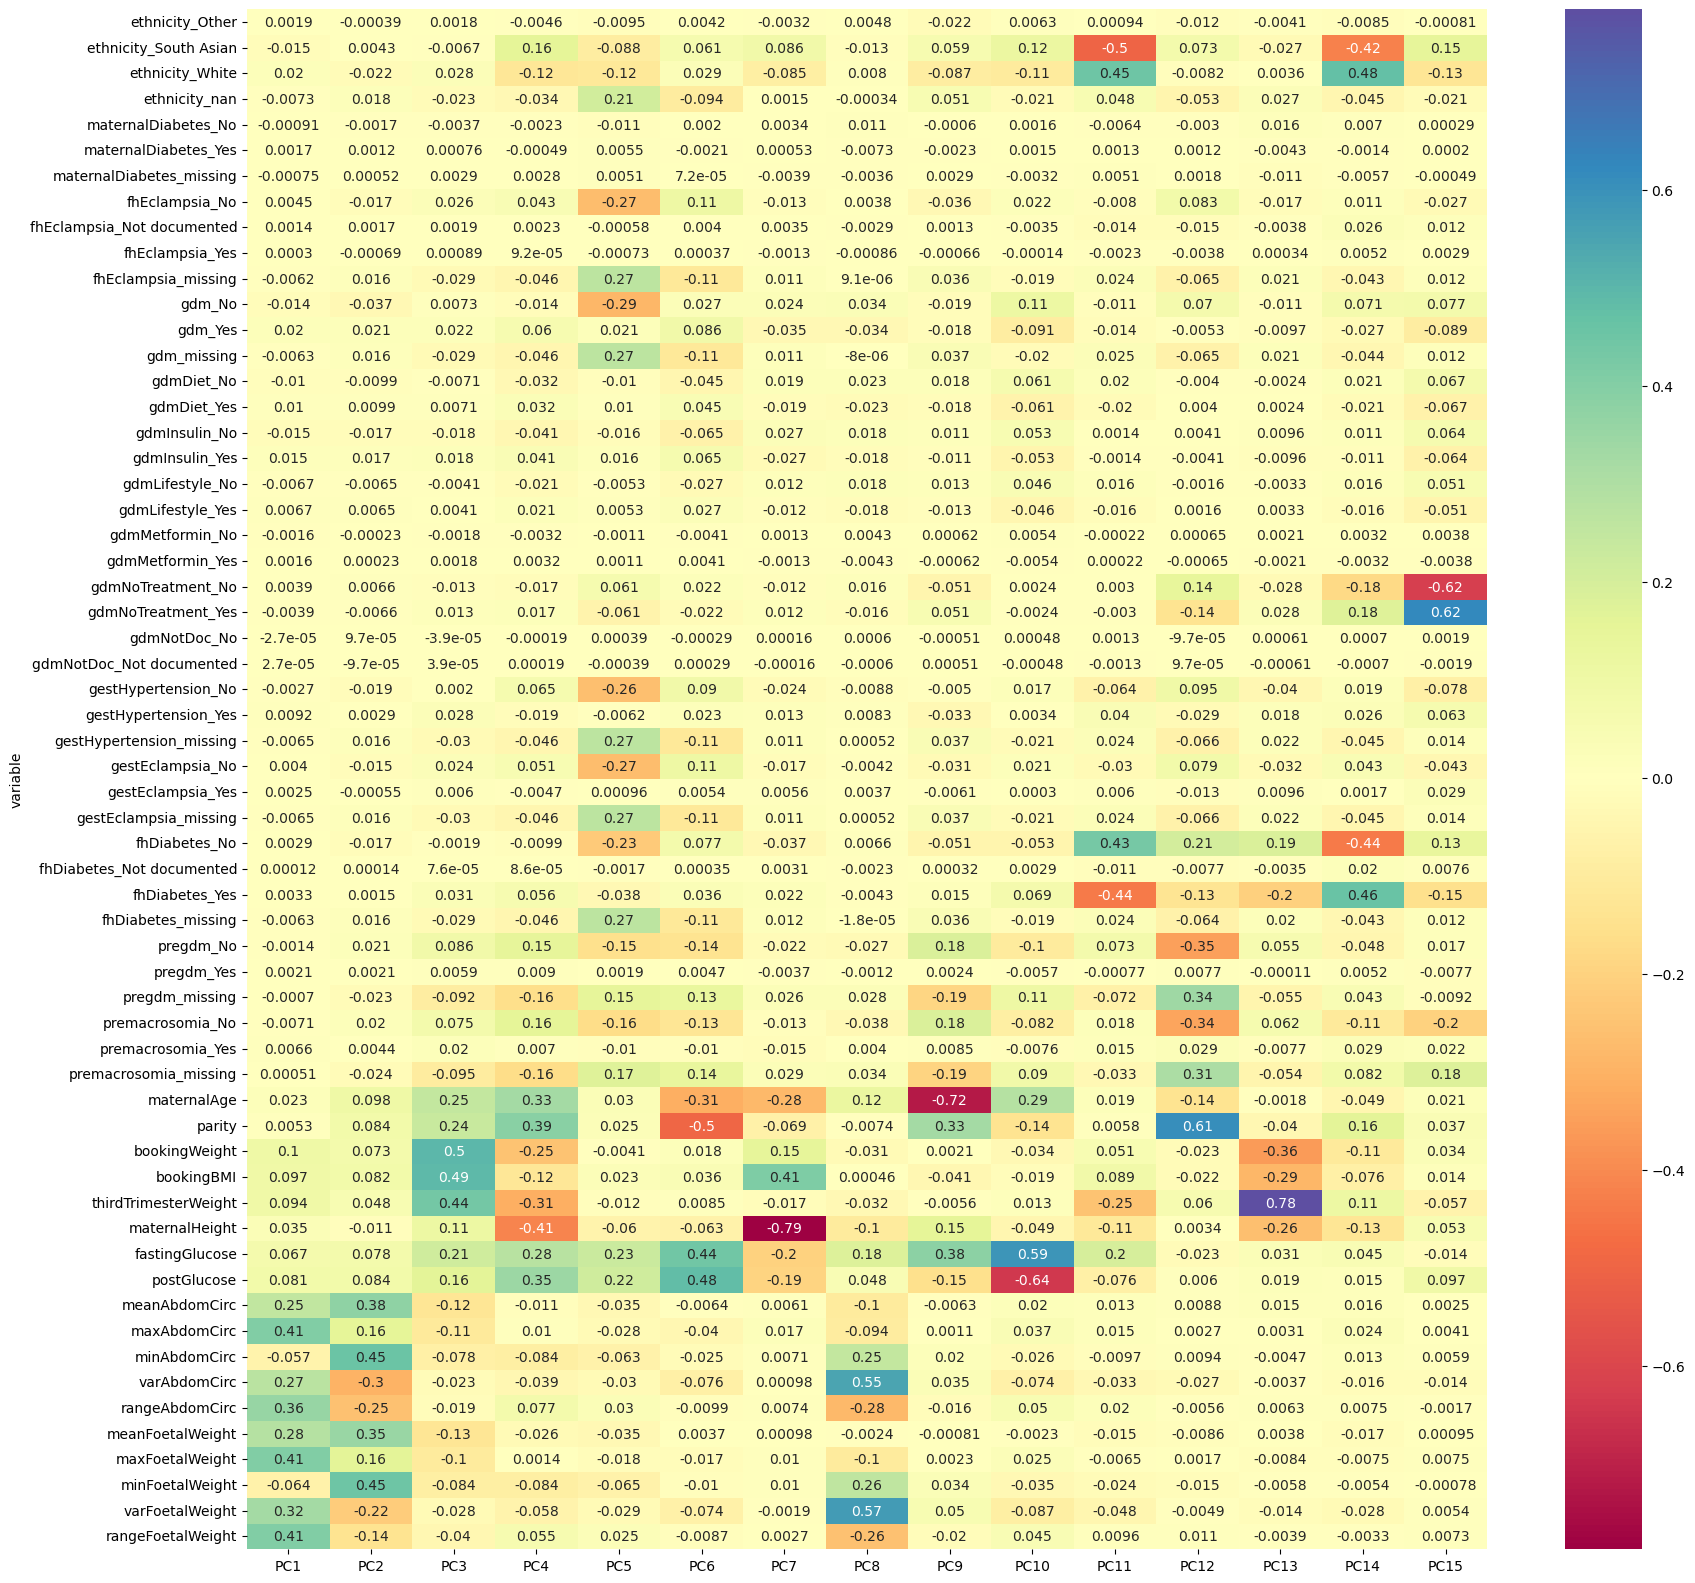

In [13]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()
fig.savefig('figures/pca/bib_GDM_pca_heatmap.svg', format='svg', dpi=1200)

In [15]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


model = PCA(n_components=15).fit(X)
X_pc = model.transform(X)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
print(df)

       0                      1
0    PC1      rangeFoetalWeight
1    PC2           minAbdomCirc
2    PC3          bookingWeight
3    PC4         maternalHeight
4    PC5                 gdm_No
5    PC6                 parity
6    PC7         maternalHeight
7    PC8        varFoetalWeight
8    PC9            maternalAge
9   PC10            postGlucose
10  PC11  ethnicity_South Asian
11  PC12                 parity
12  PC13   thirdTrimesterWeight
13  PC14        ethnicity_White
14  PC15      gdmNoTreatment_No


In [15]:
def evaluate_model(y_test, y_pred):
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0] 
    
    print('Classification Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))
    print('Classification Error: %.3f' % (1 - metrics.accuracy_score(y_test, y_pred)))
    print('Sensitivity: %.3f' % metrics.recall_score(y_test, y_pred))
    print('Specificity: %.3f' % (TN / float(TN + FP)))
    print('False Positive Rate: %.3f' % (FP / float(TN + FP)))
    print('Precision: %.3f' % (TP / float(TP + FP)))
    print('F1 Score: %.3f' % metrics.f1_score(y_test, y_pred))
    print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


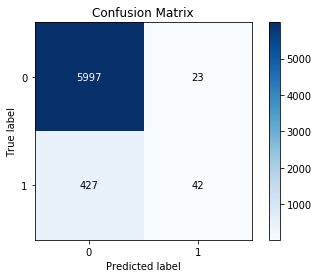

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6020
           1       0.65      0.09      0.16       469

    accuracy                           0.93      6489
   macro avg       0.79      0.54      0.56      6489
weighted avg       0.91      0.93      0.91      6489

Classification Accuracy: 0.931
Classification Error: 0.069
Sensitivity: 0.090
Specificity: 0.996
False Positive Rate: 0.004
Precision: 0.646
F1 Score: 0.157
AUC: 0.543


In [16]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)


# baseline without PCA
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'lbfgs')

# fit the model
log = LogisticRegression(solver='lbfgs')
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

# evaluate predictions
evaluate_model(y_test, y_pred)

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


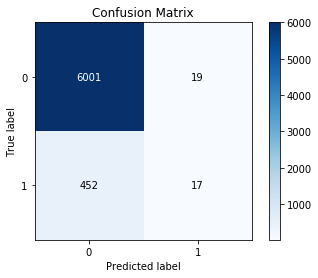

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6020
           1       0.47      0.04      0.07       469

    accuracy                           0.93      6489
   macro avg       0.70      0.52      0.51      6489
weighted avg       0.90      0.93      0.90      6489

Classification Accuracy: 0.927
Classification Error: 0.073
Sensitivity: 0.036
Specificity: 0.997
False Positive Rate: 0.003
Precision: 0.472
F1 Score: 0.067
AUC: 0.517


In [20]:
# model with PCA

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

pca = PCA(.95).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca.n_components_ 

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'lbfgs')

# fit the model
log = LogisticRegression(solver='lbfgs')
log.fit(X_train_pca, y_train)

y_pred = log.predict(X_test_pca)

# evaluate predictions
evaluate_model(y_test, y_pred)

In [ ]:
import warnings
warnings.filterwarnings("ignore")